<center><h1> TD Réseaux de Neurones </h1></center>

Pour ce dernier TD vous allez devoir réaliser 2 modélisations différentes.
Une première pour une régression sur le jeu de données california housing et le second une classification de vêtement.

#### Préambule 

Jouer sur le [tensor sandbox](https://playground.tensorflow.org/) pour voir l'effet des hyperparamètres.


#### Première partie, régression

L'objectif est de jouer sur les hyperparamètres et de regarder l'impact sur les courbes d'apprentissages

1-) Charger le jeu de données Auto MPG disponible sur le site [UCI](https://archive.ics.uci.edu/ml/index.php)

2-) Adapter votre jeu de données pour faire une régression sous Keras

3-) Faites un premier modèle de régression avec Keras en utilisant l'API séquentiel

4-) Tester un modèle wide & deep

5-) Faire une cross-validation avec scikeras pour trouver le meilleur modèle

#### Seconde partie, classification

1-) Charger le jeu de données fashion mnist

2-) Visualiser le contenu du dataset, des images

3-) Transformer les features et créer un jeu de test et d'entrainement

4-) Réaliser des modèles de classification avec keras

In [2]:
#Get package
#On peut toujours faire son pré-processing avec sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import GridSearchCV #RandomizedSearchCV marche aussi

In [5]:
#Import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from scikeras.wrappers import KerasClassifier, KerasRegressor

## Code

### 1) Import dataset

In [6]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'cylinders', 'displacement', 'horsepower', 'weight',
                'acceleration', 'model_year', 'origin']

df = pd.read_csv(url, 
                 names=column_names,
                 na_values='?', 
                 comment='\t',
                 sep=' ', 
                 skipinitialspace=True
                 )

### 2) Adapter le jeu de données

In [7]:
#On regarde si il y a des NA
df.isna().sum()

#Il y a 6 NA, ici on ne se pose pas la question et on supprime

MPG             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [73]:
df_no_na = df.dropna(axis=0)

In [10]:
#Afficher 5 premières lignes
df_no_na.head(5)

,MPG,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


La variable origin semble être de nature catégorielle, il faut la recoder au bon format.
On va utiliser un one hot encoder avec sklearn

In [34]:
df_no_na.origin.value_counts()

origin
1    245
3     79
2     68
Name: count, dtype: int64

In [69]:
#Sk one hot encoder
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df_no_na[['origin']])

In [77]:
one_hot_names = ['origin_1','origin_2','origin_3']
ohe_df = pd.DataFrame(transformed.toarray(), columns=one_hot_names)

In [83]:
#On joint l'encoding puis on supprime le feature de base
df_to_train = df_no_na.join(ohe_df).drop('origin',axis=1).dropna(axis=0)

In [85]:
#Train and test
X_train , X_test, y_train, y_test = train_test_split(df_to_train.iloc[:,1:],
                                                     df_to_train.MPG,
                                                     test_size=0.2)

In [86]:
#Standardiser les features
scaler = StandardScaler()
scaler.fit(X_train)
# On transforme X_train et X_test avec le calcul de moyenne et std du X_train
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [87]:
#Clear session and set seed
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [88]:
#Initialisation du modèle
reg_model = keras.models.Sequential()
#Shape input, number of columns
reg_model.add(keras.layers.Input(shape=X_train.shape[1]))#input layer
reg_model.add(keras.layers.Dense(100, activation='relu'))#Hidden layer, 100 neurones
reg_model.add(keras.layers.Dense(1))#Output layer

#Compil model parameter
reg_model.compile(loss=keras.losses.mean_squared_error, 
                  optimizer=keras.optimizers.Adam(learning_rate=0.01)
                 )
#Fit model


In [95]:
history = reg_model.fit(X_train_sc, y_train, batch_size=2, epochs=50, validation_split=0.2)

Epoch 1/50
123/123 [==============================] - 0s 3ms/step - loss: 9.5689 - val_loss: 10.7831
Epoch 2/50
123/123 [==============================] - 0s 3ms/step - loss: 12.4662 - val_loss: 23.7758
Epoch 3/50
123/123 [==============================] - 0s 3ms/step - loss: 8.4048 - val_loss: 11.2440
Epoch 4/50
123/123 [==============================] - 0s 3ms/step - loss: 8.2067 - val_loss: 15.1553
Epoch 5/50
123/123 [==============================] - 0s 2ms/step - loss: 7.5775 - val_loss: 12.8387
Epoch 6/50
123/123 [==============================] - 0s 3ms/step - loss: 7.9875 - val_loss: 10.5398
Epoch 7/50
123/123 [==============================] - 0s 2ms/step - loss: 7.4357 - val_loss: 10.0995
Epoch 8/50
123/123 [==============================] - 0s 3ms/step - loss: 8.5369 - val_loss: 8.7974
Epoch 9/50
123/123 [==============================] - 0s 2ms/step - loss: 7.3936 - val_loss: 9.0382
Epoch 10/50
123/123 [==============================] - 0s 2ms/step - loss: 5.8067 - val_loss

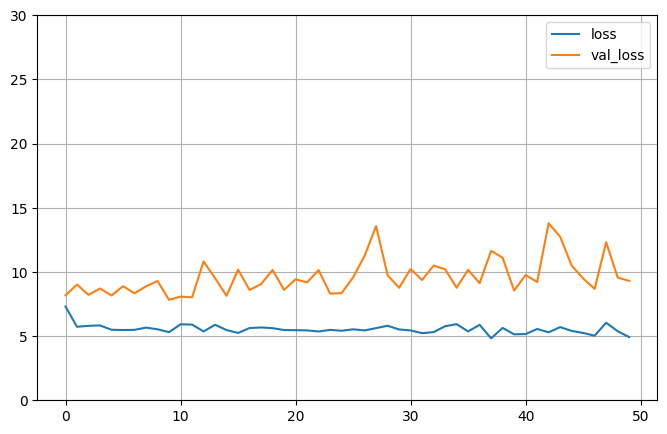

In [94]:
import matplotlib.pyplot as plt

#Data to pandas dataframe
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 30) 
plt.show()

### Wide and Deep